## Regression Models

## Advertising Dataset

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading and studying the data set
adv = pd.read_csv(r"D:\Dataset\advertising.csv")
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
#Data Cleaning and analysis
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
adv.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
for i in adv.columns:
    print(i,':','\n',adv[i].unique(),'\n')

TV : 
 [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206.8 215.4 284.3  

In [8]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


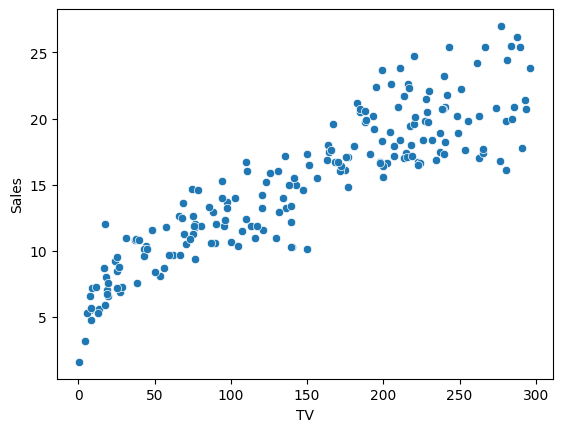

In [9]:
#Data Visualization
sns.scatterplot(x=adv.TV,y=adv.Sales)
plt.show()

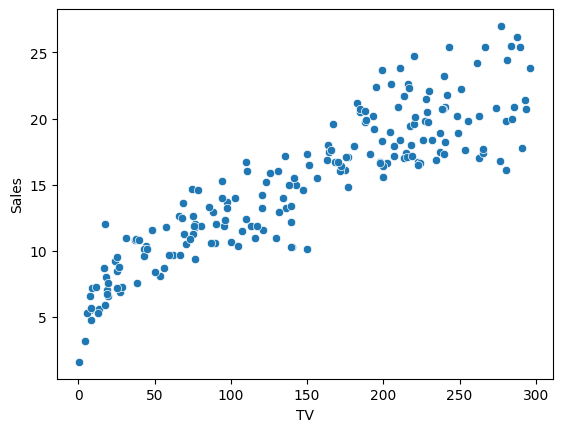

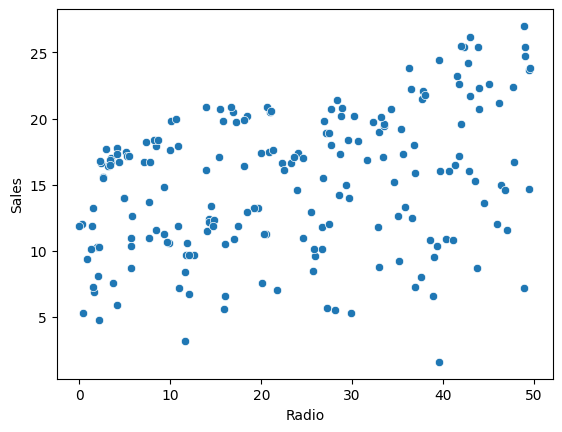

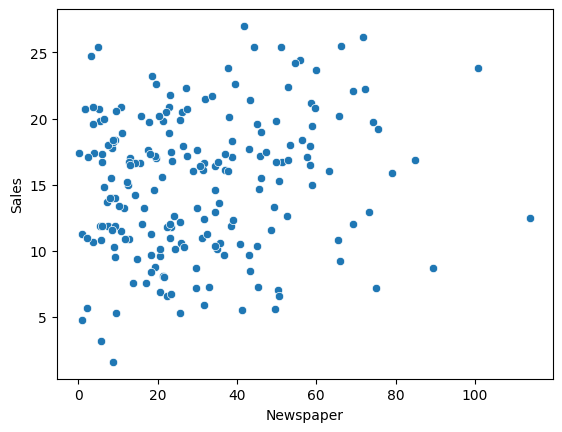

In [10]:
for i in ['TV','Radio','Newspaper']:
    sns.scatterplot(x=adv[i],y=adv.Sales)
    plt.show()

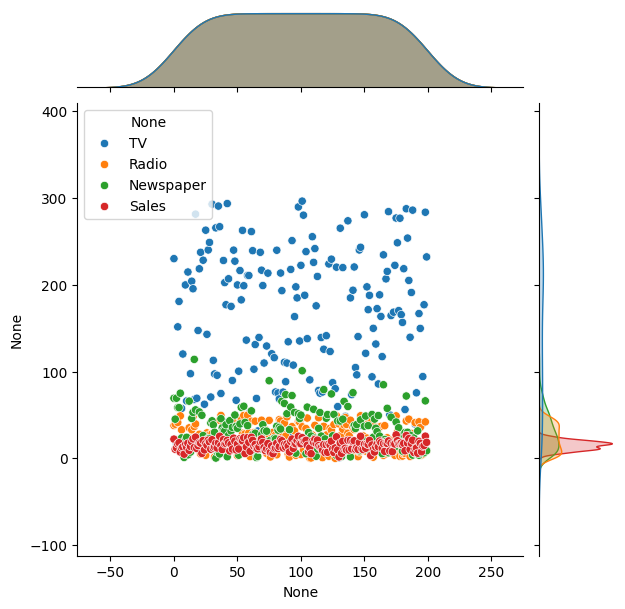

In [11]:
sns.jointplot(data=adv)
plt.show()

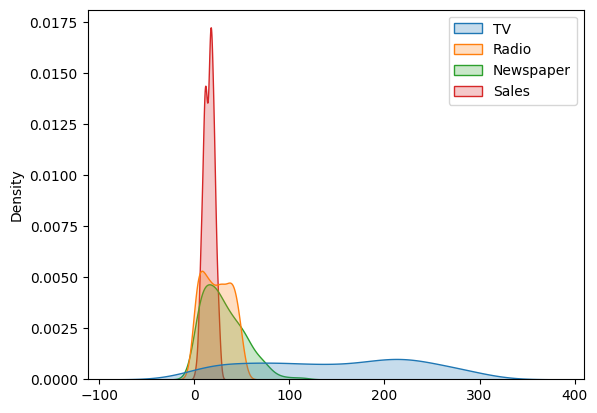

In [12]:
sns.kdeplot(data=adv,fill=True)
plt.show()

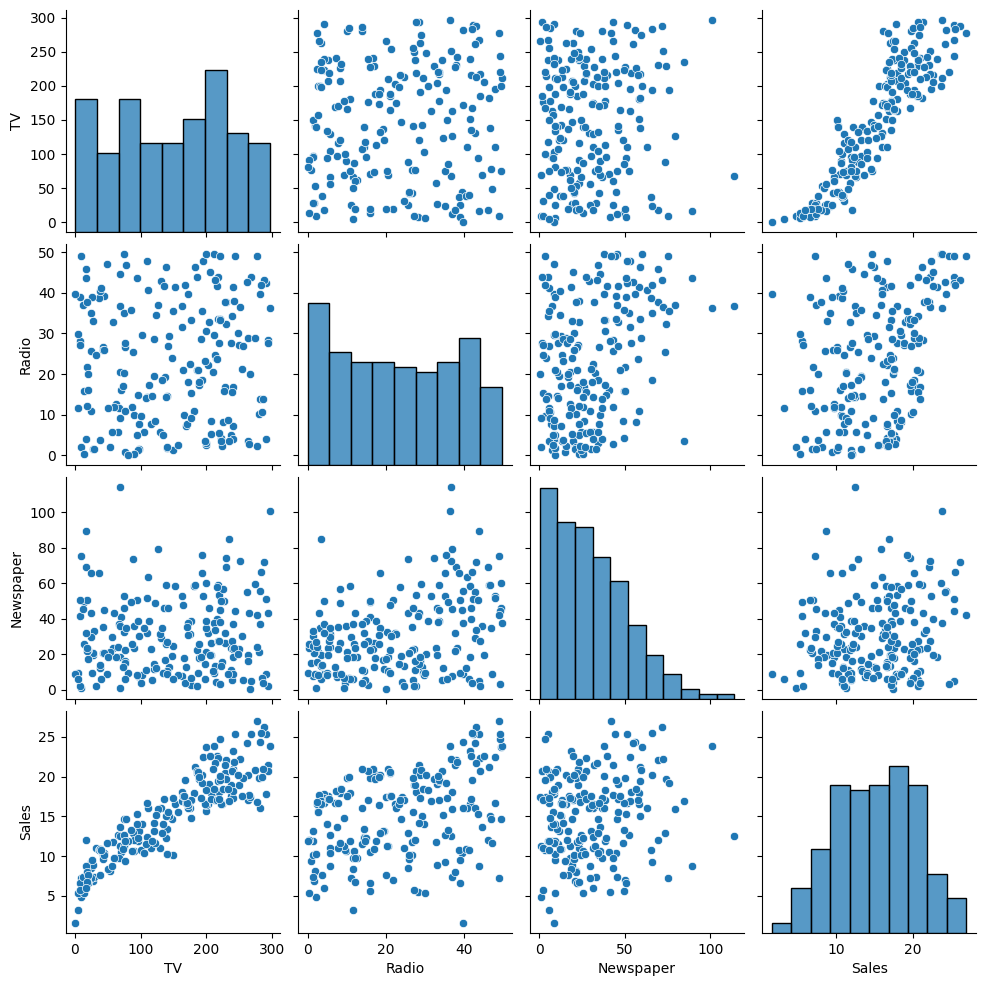

In [13]:
sns.pairplot(adv)
plt.show()

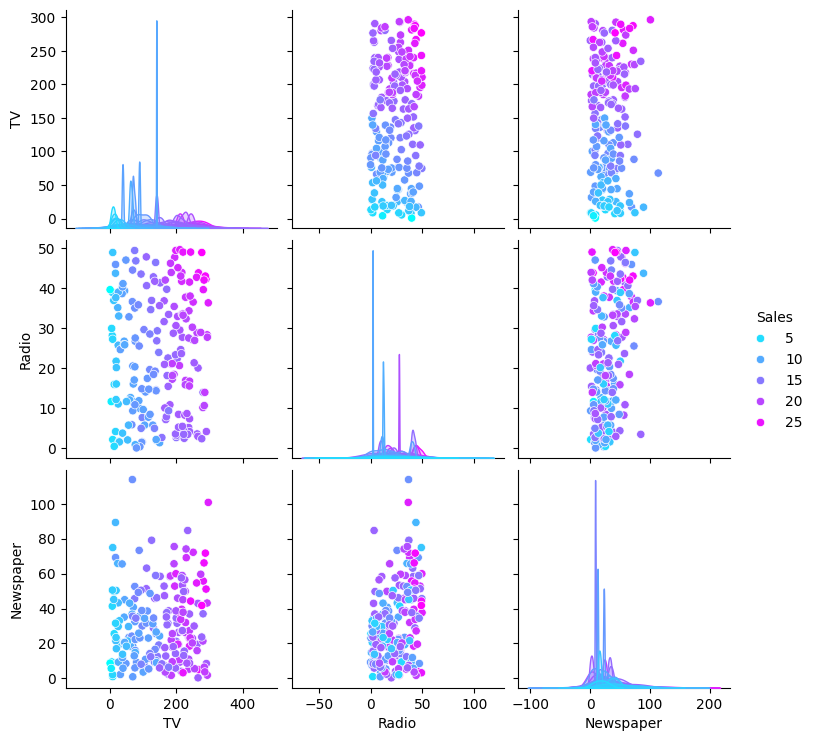

In [14]:
sns.pairplot(adv,hue='Sales',palette='cool')
plt.show()

In [15]:
c = adv.corr()
c

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


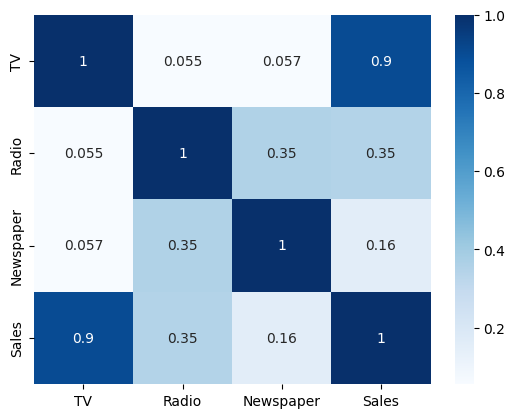

In [16]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [17]:
#Encoding

In [18]:
#in/op creation
ip = adv.drop('Sales',axis=1)
op = adv.Sales

In [19]:
ip.head() 

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
op.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip,op,test_size=0.2,random_state=3)

In [22]:
x_train

,TV,Radio,Newspaper
156,93.9,43.5,50.5
115,75.1,35.0,52.7
155,4.1,11.6,5.7
15,195.4,47.7,52.9
61,261.3,42.7,54.7
...,...,...,...
0,230.1,37.8,69.2
184,253.8,21.3,30.0
131,265.2,2.9,43.0
152,197.6,23.3,14.2


In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [24]:
#Standard Scaler Transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
x_train

array([[-0.62579748,  1.39757261,  0.91683005],
       [-0.83959224,  0.81633695,  1.01775389],
       [-1.64700866, -0.78377065, -1.13834642],
       [ 0.52846684,  1.68477142,  1.02692879],
       [ 1.27788574,  1.34286808,  1.10950284],
       [ 1.45528991,  1.76682822,  0.51772212],
       [-0.08676173,  0.25561548,  0.71956981],
       [-1.68567367,  1.13088801, -1.00072299],
       [ 0.90260768, -0.42135312, -0.19791969],
       [ 0.25440014,  1.13772608,  0.32963677],
       [-0.40972829, -0.38716279,  0.3709238 ],
       [ 0.44317637, -0.40083892, -0.57867783],
       [-0.44498169,  1.69160948,  0.95811707],
       [-1.59810879,  0.28296775, -1.30349452],
       [ 1.21079057,  0.26245355, -1.14752131],
       [-1.60493203,  1.08302155,  0.92141749],
       [ 1.50646419,  1.13088801,  1.15996476],
       [ 1.6372429 ,  0.35818648,  0.58194638],
       [ 1.45301549, -1.41971086, -0.31260587],
       [ 0.4488624 , -0.33929632, -0.22544437],
       [-0.32330062,  0.37186261, -0.748

## Linear Regression

In [26]:
#ML Algorithim
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#Prediction
pred = lr.predict(x_test)
pred

array([18.98830462, 11.16190101, 19.8439492 , 15.99746555,  8.22867142,
       10.73975484, 26.56971668, 10.65406475, 19.6116695 , 18.57732873,
       15.39253339, 12.67095722, 20.93218621, 10.37865631, 14.13693181,
       15.26667862, 17.50339018, 17.72427339, 18.48411937, 22.19719483,
       20.18422486, 11.1835828 ,  9.06389194, 10.78895478,  8.09691355,
       12.9804461 , 22.5892956 , 18.34380189, 26.60289811, 11.43130388,
       16.44808924, 23.16826577,  8.38172636, 10.08295603,  9.33407908,
       10.33156099, 16.61222749,  8.84520254, 14.13187574, 12.96395562])

In [28]:
y_test

40     16.6
51     10.7
139    20.7
197    14.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    16.7
179    17.6
83     13.6
25     17.0
190    10.8
159    12.9
173    16.7
95     16.9
3      16.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    16.6
101    23.8
86     12.0
64     16.0
47     23.2
158     7.3
34     11.9
38     10.1
196    14.0
4      17.9
72      8.8
67     13.4
145    10.3
Name: Sales, dtype: float64

In [29]:
#Accuracy
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)

print('MSE : ',mse)
print('R2 Score : ',r2)

MSE :  2.3082104039612523
R2 Score :  0.9115405118554368


In [30]:
#Lmplot : Linear model plot
df = pd.DataFrame({'Y_Test':list(y_test),'Prediction':pred})
df

,Y_Test,Prediction
0,16.6,18.988305
1,10.7,11.161901
2,20.7,19.843949
3,14.8,15.997466
4,8.4,8.228671
5,11.3,10.739755
6,26.2,26.569717
7,10.6,10.654065
8,18.3,19.611670
9,16.7,18.577329


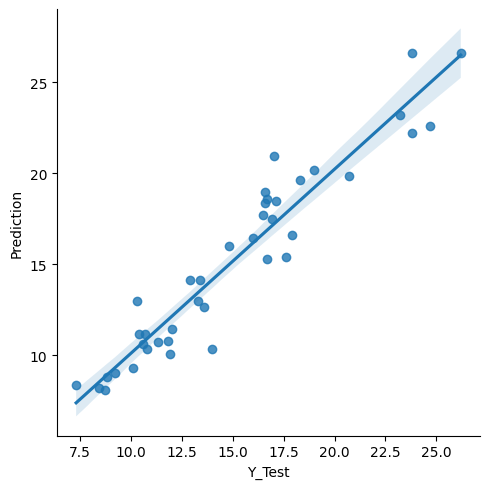

In [31]:
sns.lmplot(x='Y_Test',y='Prediction',data=df)
plt.show()

## Auto MPG Dataset

In [32]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [33]:
mp = pd.read_csv(r"D:\Dataset\auto+mpg\auto-mpg.data",header=None,delim_whitespace=True)
mp

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [34]:
mp.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
mp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [35]:
mp.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [36]:
mp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [37]:
mp.drop('car name',axis=1,inplace=True)

In [38]:
mp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [39]:
for i in mp.columns:
    print(i,':','\n',mp[i].unique(),':')

mpg : 
 [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ] :
cylinders : 
 [8 4 6 3 5] :
displacement : 
 [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  

In [40]:
for i in mp.columns:
    print(i,':',sum(mp[i]=='?'))

mpg : 0
cylinders : 0
displacement : 0
horsepower : 6
weight : 0
acceleration : 0
model year : 0
origin : 0


In [41]:
mp.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


In [42]:
mp.horsepower.replace('?',mp['horsepower'][2],inplace=True)

In [43]:
for i in mp.columns:
    print(i,':',sum(mp[i]=='?'))

mpg : 0
cylinders : 0
displacement : 0
horsepower : 0
weight : 0
acceleration : 0
model year : 0
origin : 0


In [44]:
mp.horsepower = mp.horsepower.astype('float')

In [45]:
mp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

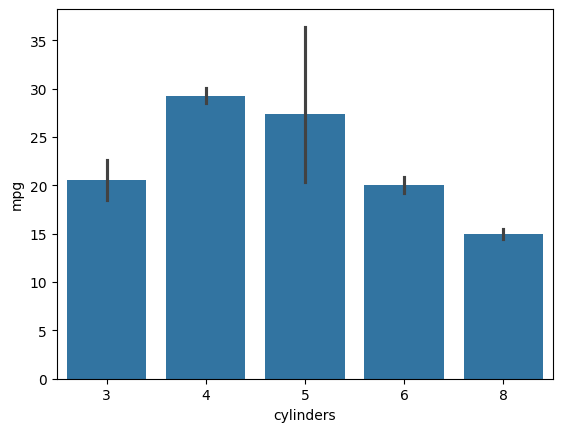

In [47]:
sns.barplot(y=mp.mpg,x=mp.cylinders)
plt.show()

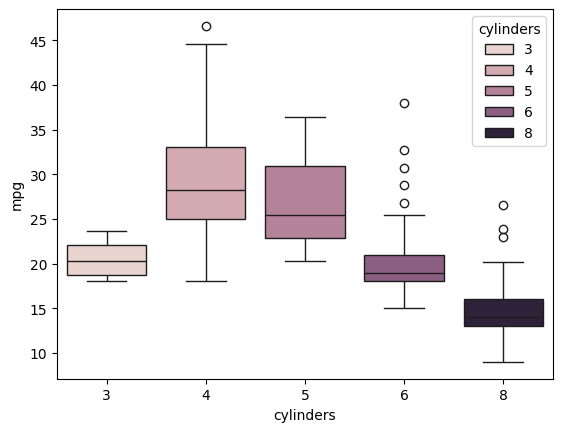

In [48]:
sns.boxplot(y=mp.mpg,x=mp.cylinders,hue=mp.cylinders)
plt.show()

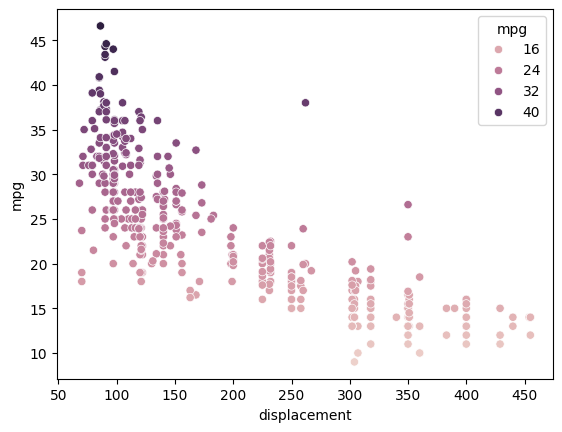

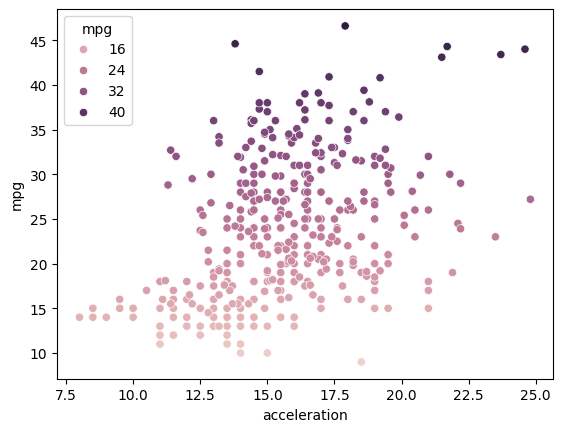

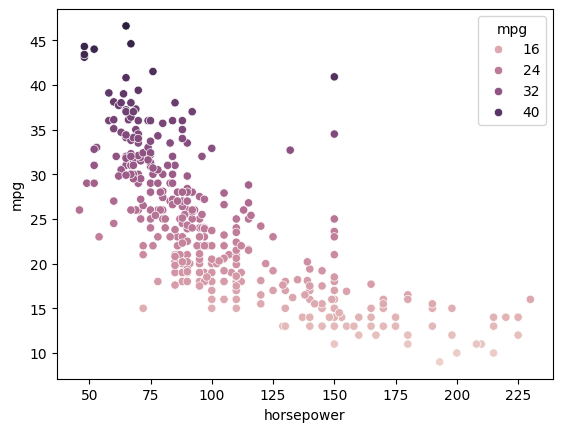

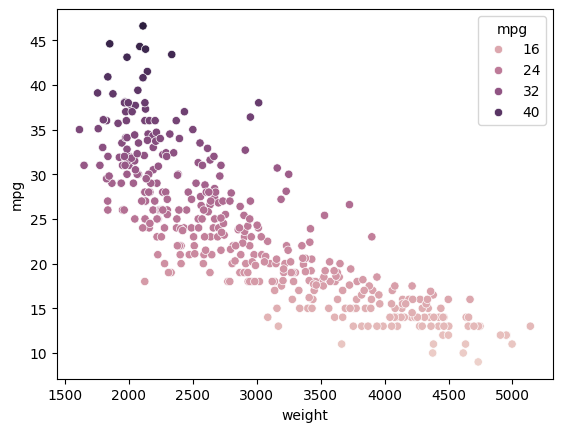

In [49]:
for i in ['displacement','acceleration','horsepower','weight']:
    sns.scatterplot(x=mp[i],y=mp.mpg,hue=mp.mpg)
    plt.show()

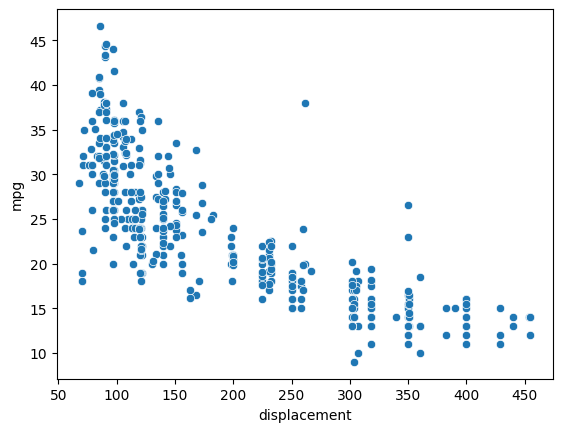

In [50]:
sns.scatterplot(y=mp.mpg,x=mp.displacement)
plt.show()

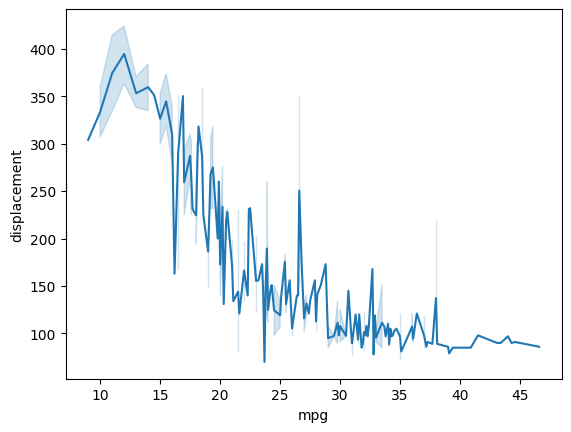

In [51]:
sns.lineplot(x=mp.mpg,y=mp.displacement)
plt.show()

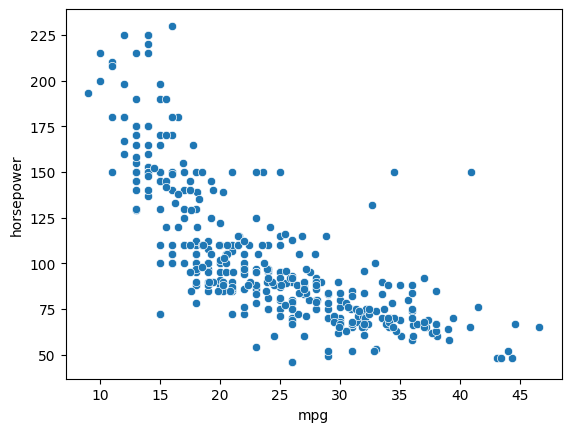

In [52]:
sns.scatterplot(x=mp.mpg,y=mp.horsepower)
plt.show()

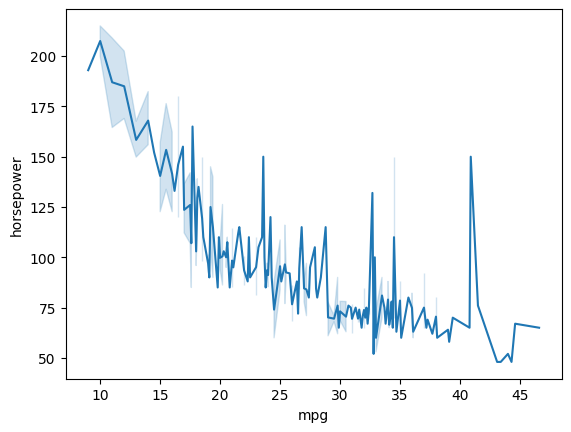

In [53]:
sns.lineplot(x=mp.mpg,y=mp.horsepower)
plt.show()

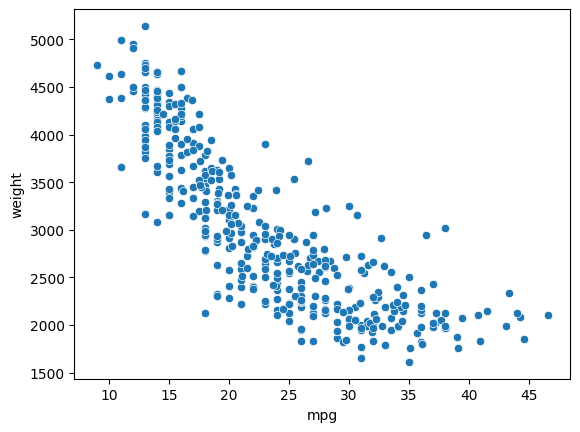

In [54]:
sns.scatterplot(x=mp.mpg,y=mp.weight)
plt.show()

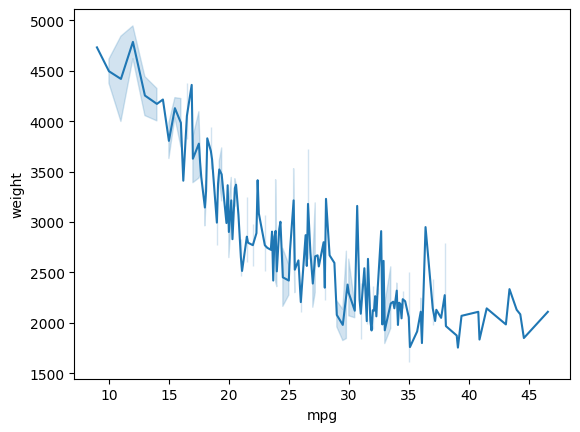

In [55]:
sns.lineplot(x=mp.mpg,y=mp.weight)
plt.show()

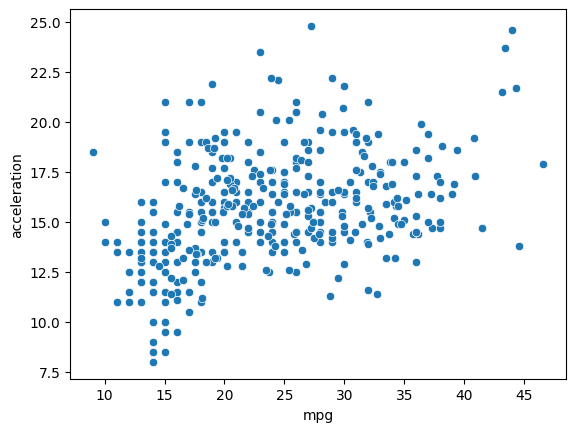

In [56]:
sns.scatterplot(x=mp.mpg,y=mp.acceleration)
plt.show()

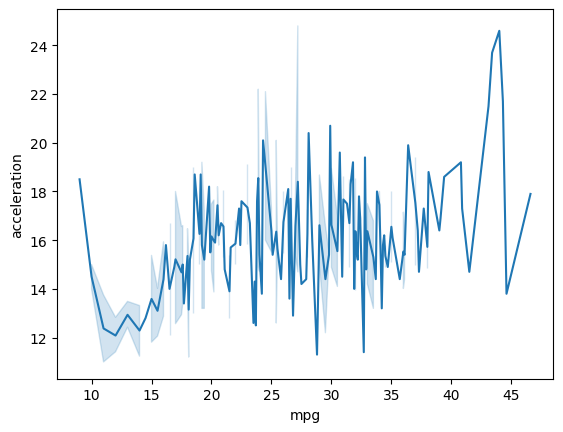

In [57]:
sns.lineplot(x=mp.mpg,y=mp.acceleration)
plt.show()

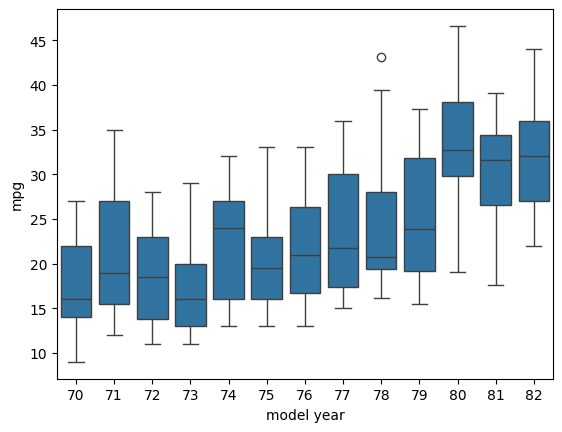

In [58]:
sns.boxplot(y=mp.mpg,x=mp['model year'])
plt.show()

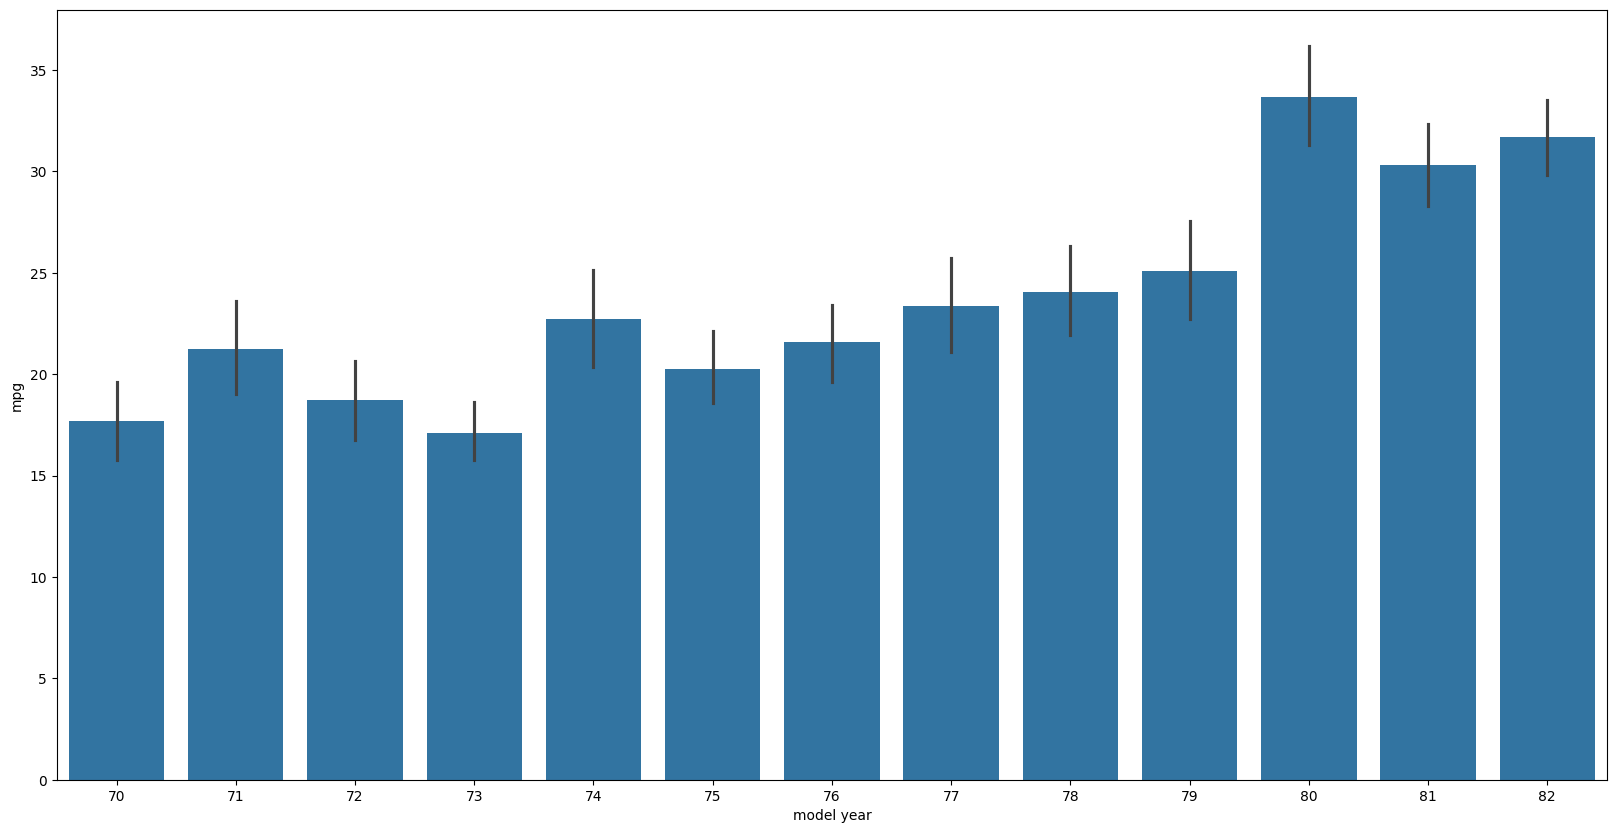

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(y=mp.mpg,x=mp['model year'])
plt.show()

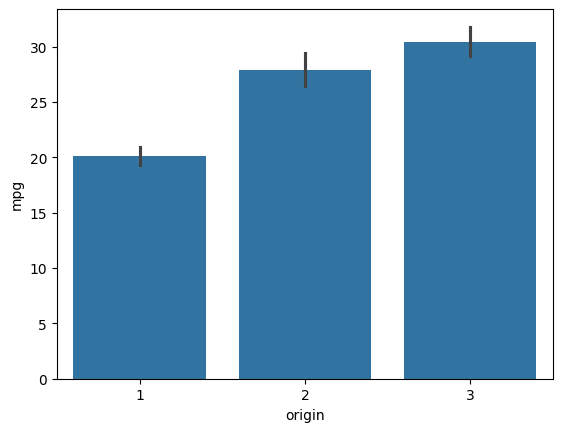

In [60]:
sns.barplot(y=mp.mpg,x=mp.origin)
plt.show()

In [61]:
c = mp.corr()
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


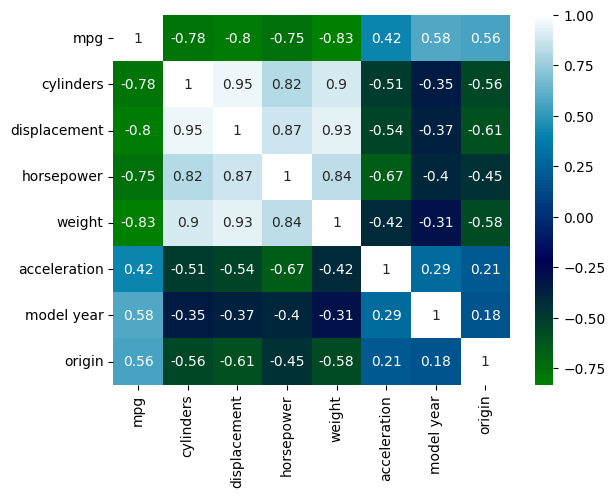

In [62]:
sns.heatmap(c,annot=True,cmap='ocean')
plt.show()

In [63]:
#ip = mp['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
ip = mp.drop('mpg',axis=1)  #this is easy way , just drop the output column from input
op = mp.mpg

In [64]:
ip.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [65]:
op.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip,op,test_size=0.3,random_state=3)

In [67]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
65,8,351.0,153.0,4129.0,13.0,72,1
251,8,302.0,139.0,3570.0,12.8,78,1
238,4,98.0,83.0,2075.0,15.9,77,1
321,4,108.0,75.0,2265.0,15.2,80,3
70,8,400.0,190.0,4422.0,12.5,72,1
...,...,...,...,...,...,...,...
256,6,225.0,100.0,3430.0,17.2,78,1
131,4,71.0,65.0,1836.0,21.0,74,3
249,8,260.0,110.0,3365.0,15.5,78,1
152,6,225.0,95.0,3264.0,16.0,75,1


In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(278, 7)
(278,)
(120, 7)
(120,)


In [69]:
from sklearn.preprocessing import StandardScaler
ts = StandardScaler()

x_train = ts.fit_transform(x_train)
x_test = ts.fit_transform(x_test)

In [70]:
x_train

array([[ 1.44042885,  1.45043188,  1.19778563, ..., -0.9151769 ,
        -1.13768026, -0.71178092],
       [ 1.44042885,  0.98638906,  0.83349856, ..., -0.98792006,
         0.50958595, -0.71178092],
       [-0.88095793, -0.9455443 , -0.62364973, ...,  0.13959882,
         0.23504158, -0.71178092],
       ...,
       [ 1.44042885,  0.58863808,  0.07890391, ..., -0.00588749,
         0.50958595, -0.71178092],
       [ 0.27973546,  0.25717892, -0.31140367, ...,  0.1759704 ,
        -0.31404716, -0.71178092],
       [ 0.27973546, -0.49097174,  0.33910896, ..., -0.62420429,
         1.33321906,  1.84144613]])

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## pywhatkit

In [75]:
#to install pywhatkit
!pip install pywhatkit

In [76]:
import pywhatkit as kit

In [81]:
#to watch a video on youtube
kit.playonyt('Millionaire')

'https://www.youtube.com/watch?v=XO8wew38VM8\\\\u0026pp=ygULTWlsbGlvbmFpcmU%3D'

In [28]:
#to search something on browser
kit.search('Pandas')

In [29]:
#to generate some information about something
kit.info('What is Machine Learning')

Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance.
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.


In [33]:
#image to ascii 
kit.image_to_ascii_art(r"D:\New Downloads\doremon.jpg",r"D:\New Downloads\doremon.txt")

'::::::::::::::::::::::::::::::::!!!!!:::::::::::::::::::::::::::::::::::::::::::\n::::::::::::::::::::::::::::::!*!!!!!*!:::::::::::::::::::::::::::::::::::::::::\n::::::::::::::::::::::::::::::*!!!!!!!*:::::::::::::::::::::::::::::::::::::::::\n::::::::::::::::::::::::::::::!*!!!!!*!:::::::::::::::::::::::::::::::::::::::::\n:::::::::::::::::::::::::::::::!**!!*!::::::::::::::::::::::::::::::::::::::::::\n:::::::::::::::::::::::::::::::!!:::::!**%%%***!!:::::::::::::::::::::::::::::::\n:::::::::::::::::::::::::::::::*::::*%$%%$%:!*@%*%*:::::::::::::::::::::::::::::\n:::::::::::::::::::::::::::::::!!::$$!:!::**$$@:.%@$*:::::::::::::::::::::::::::\n::::::::::::::::::::::::::::::::*:$%::!!*:!&@%::!$@$@$::::::::::::::::::::::::::\n::::::::::::::::::::::::::::::::**$!*!!!:.:!.:**!!*$$$$:::::::::::::::::::::::::\n::::::::::::::::::::::::::::::!!!%*.$&@@$$$*!!!!!:.!@$@*::::::::::::::::::::::::\n::::::::::::::::::::::::::::!*!..!*.:&&&&&&&&&@@@%:.$$$$::::::::::::::::::::::::\n:::::::::::::::